In [ ]:
# install prettytable to create a table for Task 1
!pip install PTable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import necessary packages
import pandas as pd
import prettytable
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable

In [ ]:
# read a csv file fwonloaded from WRDS. For more details, please, see the pdf document
df=pd.read_csv('datacsv.csv')

In [ ]:
# filter out non-NA and positive values for total revenue and total assets. Use "fic" as an identifier for US companies
df=df[(df["at"] > 0)&(df["revt"] > 0)&(df["fic"] == "USA")]

In [ ]:
# Task 1 (a)

In [ ]:
x1=len(df[(df["fyear"] >= 1950)& (df["fyear"] < 1970)].index)
x2=len(df[(df["fyear"] >= 1970)& (df["fyear"] < 1980)].index)
x3=len(df[(df["fyear"] >= 1980)& (df["fyear"] < 1990)].index)
x4=len(df[(df["fyear"] >= 1990)& (df["fyear"] < 2000)].index)
x5=len(df[(df["fyear"] >= 2000)& (df["fyear"] < 2010)].index)
x6=len(df[(df["fyear"] >= 2010)& (df["fyear"] <= 2017)].index)
x7=len(df.index)

In [ ]:
# create a table for Task 1
print("\033[1m" +"Panel B"+"\033[0m"+": Revenue approximate randomization analysis sample (firm-year revenue observations by decade)")

y = PrettyTable(border=1, header=1)

y.field_names = ["Decade", "N"]

y.add_row(["1950s and 1960s", x1])
y.add_row(["1970s", x2])
y.add_row(["1980s", x3])
y.add_row(["1990s", x4])
y.add_row(["2000s", x5])
y.add_row(["2010s", x6])
y.add_row(["Total", x7])

print(y)

Panel B: Revenue approximate randomization analysis sample (firm-year revenue observations by decade)
+-----------------+--------+
|      Decade     |   N    |
+-----------------+--------+
| 1950s and 1960s | 34339  |
|      1970s      | 54323  |
|      1980s      | 68399  |
|      1990s      | 90661  |
|      2000s      | 81698  |
|      2010s      | 51815  |
|      Total      | 381235 |
+-----------------+--------+


In [ ]:
# Task 1 (b)

In [ ]:
# set thresholds as prescribed in the paper
thresholds = [100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,2000000,3000000,4000000,5000000,6000000,7000000,8000000,9000000,10000000,20000000,30000000,40000000,50000000,60000000,70000000,80000000,90000000,100000000,200000000,300000000,400000000,500000000,600000000,700000000,800000000,900000000,1000000000,2000000000,3000000000,4000000000,5000000000,6000000000,7000000000,8000000000,9000000000,10000000000,20000000000,30000000000,40000000000,50000000000,60000000000,70000000000,80000000000]

In [ ]:
# create empty list
bindata= []

In [ ]:
# Whereas the approach for creating Figure 2 is not described explicitly, I created two figures.
# Use for and if loops following the assumption that revenues' deviations from all thresholds are summed across all 53 of them
for a in df["revt"]:
  for b in thresholds:
    if a/(b/1000000)>=1:
      c=((a/(b/1000000))-1)*100
    else:
      c=-((1-(a/(b/1000000)))*100)
    bindata.append(c)

In [ ]:
# create margins for bins
np.linspace(-12.5, 12.5, 101)

array([-12.5 , -12.25, -12.  , -11.75, -11.5 , -11.25, -11.  , -10.75,
       -10.5 , -10.25, -10.  ,  -9.75,  -9.5 ,  -9.25,  -9.  ,  -8.75,
        -8.5 ,  -8.25,  -8.  ,  -7.75,  -7.5 ,  -7.25,  -7.  ,  -6.75,
        -6.5 ,  -6.25,  -6.  ,  -5.75,  -5.5 ,  -5.25,  -5.  ,  -4.75,
        -4.5 ,  -4.25,  -4.  ,  -3.75,  -3.5 ,  -3.25,  -3.  ,  -2.75,
        -2.5 ,  -2.25,  -2.  ,  -1.75,  -1.5 ,  -1.25,  -1.  ,  -0.75,
        -0.5 ,  -0.25,   0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,
         1.5 ,   1.75,   2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,
         3.5 ,   3.75,   4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,
         5.5 ,   5.75,   6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,
         7.5 ,   7.75,   8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,
         9.5 ,   9.75,  10.  ,  10.25,  10.5 ,  10.75,  11.  ,  11.25,
        11.5 ,  11.75,  12.  ,  12.25,  12.5 ])

In [ ]:
# drop values that do not fall within the specified bins
histdata1=pd.cut(bindata, bins=np.linspace(-12.5, 12.5, 101)).dropna()

In [ ]:
# count number of occurances of each bin
xx=histdata1.value_counts()

In [ ]:
#create labels for the x axis
labels1=list(range(-50,50,5))

AxesSubplot(0.125,0.125;0.775x0.755)


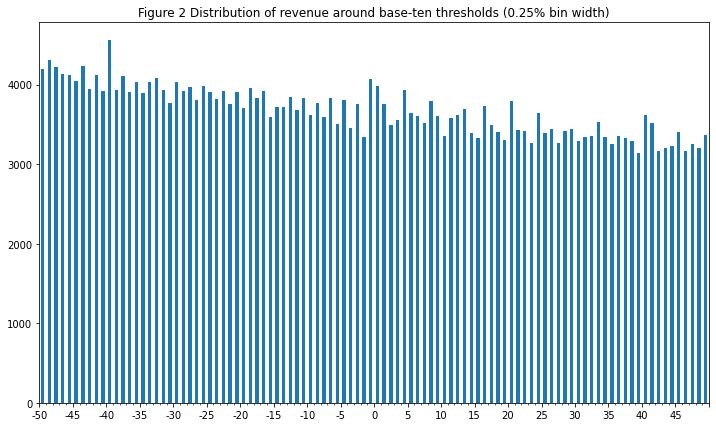

In [ ]:
# plot the graph
jj=histdata1.value_counts().plot(kind='bar', title ="Figure 2 Distribution of revenue around base-ten thresholds (0.25% bin width)", figsize=(12,7),legend=False, fontsize=10)
jj.set_xticklabels(labels1, rotation=0)
# set the labels for the x axis
jj.xaxis.set_major_locator(plt.LinearLocator(21))
jj.xaxis.set_minor_locator(plt.LinearLocator(101))
print(jj)

In [ ]:
# Use for and if loops following the assumption that the closest to 0 revenues' deviation from all thresholds is determined and is then summed across all 53 of thresholds
bindata=[]
# an empty list to determine the smallest deviation for each individual observation across all thresholds
temp=[]
for a in df["revt"]:
  for b in thresholds:
    if a/(b/1000000)>=1:
      c=((a/(b/1000000))-1)*100
    else:
      c=-((1-(a/(b/1000000)))*100)
    temp.append(c)
  bindata.append(min(temp, key=abs))
  temp=[]

In [ ]:
# drop values that do not fall within the specified bins
histdata1=pd.cut(bindata, bins=np.linspace(-12.5, 12.5, 101)).dropna()

In [ ]:
# count number of occurances of each bin
xx=histdata1.value_counts()

In [ ]:
#create labels for the x axis
labels1=list(range(-50,50,5))

AxesSubplot(0.125,0.125;0.775x0.755)


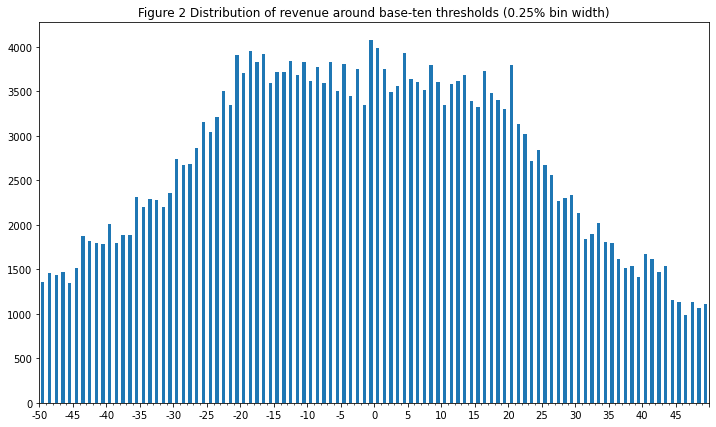

In [ ]:
# plot the graph
jj=histdata1.value_counts().plot(kind='bar', title ="Figure 2 Distribution of revenue around base-ten thresholds (0.25% bin width)", figsize=(12,7),legend=False, fontsize=10)
jj.set_xticklabels(labels1, rotation=0)
# set the labels for the x axis
jj.xaxis.set_major_locator(plt.LinearLocator(21))
jj.xaxis.set_minor_locator(plt.LinearLocator(101))
print(jj)

In [ ]:
#Task 2

In [ ]:
# Knowing the revenue as given from the task, use the loop system for the second graph to determine the value with the least deviation from zero
# print out the most suitable threshold and the value
bindata=[]
a= 78546000
print("Revenue:",a)
for b in thresholds:
  if a/(b)>=1:
    c=((a/(b))-1)*100
  else:
    c=-((1-(a/(b)))*100)
  bindata.append(c)
print("Minimum:",min(bindata, key=abs))
min(bindata, key=abs)
for b in thresholds:
  if a/(b)>=1:
    c=((a/(b))-1)*100
  else:
    c=-((1-(a/(b)))*100)
  if c== min(bindata, key=abs):
    print("Threshold:",b)

Revenue: 78546000
Minimum: -1.8175000000000052
Threshold: 80000000


In [ ]:
# For Task 3, please, see the pdf document